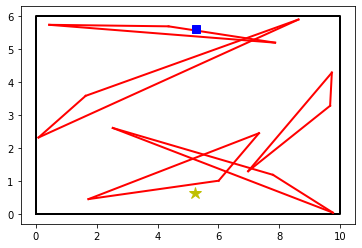

In [1]:
import numpy as np
import pylab as pl
import sys
#sys.path.append('osr_examples/scripts/')
import environment_2d
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

Q1:

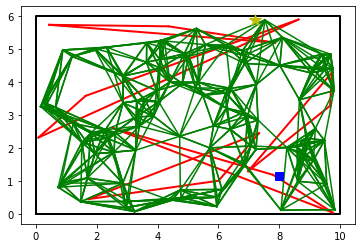

In [2]:
import numpy as np
import pylab as pl
import sys
import random



sys.path.append('osr_examples/scripts/')
import environment_2d

class PRM:
    def __init__(self, env, num_samples, num_neighbors, connection_radius):
        # Initializing the PRM class with the environment and algorithm parameters.
        self.env = env  # The environment object
        self.num_samples = num_samples  # Number of random samples to generate
        self.num_neighbors = num_neighbors  # Number of nearest neighbors to consider
        self.connection_radius = connection_radius  # Maximum distance to connect vertices
        self.vertices = []  # List to store sampled vertices
        self.edges = []  # List to store valid edges in the roadmap

    def generate_random_samples(self):
        # Generate random valid samples within the environment.
        for _ in range(self.num_samples):
            x, y = self.env.random_query()[:2]
            if self.is_valid_configuration(x, y):
                self.vertices.append((x, y))

    def is_valid_configuration(self, x, y):
        # Check if a configuration (x, y) is collision-free in the environment.
        # Modify this function to implement the collision check logic.
        # Return True if the configuration is collision-free, False otherwise.
        # Example:
        # return self.env.check_collision(x, y) == environment_2d.CollisionType.FREE
        return True  # Modify this line

    def find_neighbors(self, vertex):
        # Find the nearest neighbors of a given vertex.
        distances = [(v, np.sqrt((v[0] - vertex[0])**2 + (v[1] - vertex[1])**2)) for v in self.vertices]
        distances.sort(key=lambda x: x[1])
        return [v for v, _ in distances[:self.num_neighbors]]

    def build_roadmap(self):
        # Build the PRM roadmap by generating samples, finding neighbors, and connecting valid edges.
        self.generate_random_samples()
        for v in self.vertices:
            neighbors = self.find_neighbors(v)
            for neighbor in neighbors:
                if neighbor != v and self.is_valid_edge(v, neighbor):
                    self.edges.append((v, neighbor))

    def is_valid_edge(self, v1, v2):
        # Check if an edge (v1, v2) is collision-free in the environment.
        # Modify this function to implement the edge collision check logic.
        # Return True if the edge is collision-free, False otherwise.
        # Example:
        # return self.env.check_path(v1[0], v1[1], v2[0], v2[1]) == environment_2d.CollisionType.FREE
        return True  # Modify this line

    def plot_roadmap(self):
        # Plot the edges of the PRM roadmap on the environment.
        for v1, v2 in self.edges:
            pl.plot([v1[0], v2[0]], [v1[1], v2[1]], 'g')

if __name__ == "__main__":
    # Initialize the environment and plot it.
    np.random.seed(4)
    env = environment_2d.Environment(10, 6, 5)
    pl.clf()
    env.plot()

    # Create a PRM instance with specified parameters.
    prm = PRM(env, num_samples=100, num_neighbors=10, connection_radius=2.0)

    # Build the PRM roadmap.
    prm.build_roadmap()

    # Plot the PRM roadmap on the environment.

    prm.plot_roadmap()

    # Generate a random query and plot it if available.
    q = env.random_query()
    if q is not None:
        x_start, y_start, x_goal, y_goal = q
        env.plot_query(x_start, y_start, x_goal, y_goal)

    # Show the plot.
    pl.show()


Q2:

In [3]:
def path_shortcutting(prm, maxrep):
    path = prm.vertices  # Initialize the path with PRM vertices
    for rep in range(maxrep):
        # Pick two random points t1, t2 along the path
        t1, t2 = np.random.choice(len(path), 2, replace=False)
        
        # Ensure t1 is less than t2
        if t1 > t2:
            t1, t2 = t2, t1
        
        # Extract the subpath from t1 to t2
        subpath = path[t1:t2+1]
        
        # Check if the subpath is collision-free
        if is_collision_free(prm, subpath):
            # Replace the original portion by the straight segment
            straight_segment = [path[t1], path[t2]]
            path[t1+1:t2] = straight_segment
    
    return path


def is_collision_free(prm, path):
    # Modify this function to implement your collision check logic
    # Return True if the path is collision-free, False otherwise
    for i in range(len(path) - 1):
        if not prm.is_valid_edge(path[i], path[i+1]):
            return False
    return True

# Usage:
# Assuming we have a PRM instance 'prm' and want to shortcut the path
# maxrep is the maximum number of shortcutting iterations
maxrep = 100
shortcutted_path = path_shortcutting(prm, maxrep)

# Print or use shortcutted_path as needed
print(shortcutted_path)


[(5.279088234179204, 5.625429503705652), (5.279088234179204, 5.625429503705652), (6.865992844019503, 4.5671133301410745), (6.865992844019503, 4.5671133301410745), (6.865992844019503, 4.5671133301410745), (6.865992844019503, 4.5671133301410745)]
